In [3]:
import numpy as np
import matplotlib.pyplot as mat
from sklearn.neighbors import KNeighborsClassifier

#Define Training Data
X = np.array([[1,2],[2,3],[3,3],[6,5],[7,7],[8,6]])
Y = np.array([0,0,0,1,1,1])

#Create and Train model
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X,Y)

#Predict for a new sample
sample = np.array([[6,5]])
predicted_class = knn.predict(sample)
print("Predicted class for [6,5]: ",predicted_class)

Predicted class for [6,5]:  [1]


In [4]:
import numpy as np
import pandas as pd

#Load CSV
df = pd.read_csv("btissue.csv")
print(df)
x,y = df.iloc[:,:-1],df.iloc[:,-1]
print("Feature Shape: ",x.shape)
print("Target Shape: ",y.shape)


              I0     PA500       HFS           DA           Area        A/DA  \
0     524.794072  0.187448  0.032114   228.800228    6843.598481   29.910803   
1     330.000000  0.226893  0.265290   121.154201    3163.239472   26.109202   
2     551.879287  0.232478  0.063530   264.804935   11888.391830   44.894903   
3     380.000000  0.240855  0.286234   137.640111    5402.171180   39.248524   
4     362.831266  0.200713  0.244346   124.912559    3290.462446   26.342127   
..           ...       ...       ...          ...            ...         ...   
101  2000.000000  0.106989  0.105418   520.222649   40087.920980   77.059161   
102  2600.000000  0.200538  0.208043  1063.441427  174480.476200  164.071543   
103  1600.000000  0.071908 -0.066323   436.943603   12655.342130   28.963331   
104  2300.000000  0.045029  0.136834   185.446044    5086.292497   27.427344   
105  2600.000000  0.069988  0.048869   745.474369   39845.773700   53.450226   

         Max IP          DR            

In [5]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.3,random_state=0)
print("Train shape: ",x_tr.shape)
print("Test shape: ",x_te.shape)

Train shape:  (74, 9)
Test shape:  (32, 9)


KNN Results:

Accuracy:  0.59375
Precision:  0.6277777777777778
Recall:  0.5472222222222223
F1:  0.5370370370370371


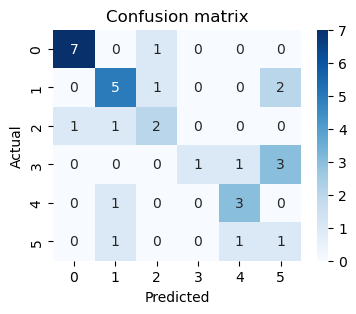

In [6]:
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
model = knn.fit(x_tr,y_tr)
y_pred = model.predict(x_te)

print("KNN Results:\n")
print('Accuracy: ',accuracy_score(y_te,y_pred))
print('Precision: ',precision_score(y_te,y_pred,average='macro',zero_division=0))
print('Recall: ',recall_score(y_te,y_pred,average='macro',zero_division=0))
print("F1: ",f1_score(y_te,y_pred,average='macro',zero_division=0))
cm=confusion_matrix(y_te,y_pred)

#Matrix showing counts of actual vs predicted labels
mat.figure (figsize=(4,3))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues') #
#Heatmap with annotation, integer format, blue colormap
mat.title("Confusion matrix")
mat.xlabel("Predicted")
mat.ylabel("Actual")
mat.show()

Decision Tree Results:

Accuracy:  0.65625
Feature improtances:  [0.24387866 0.21935856 0.12109848 0.         0.         0.
 0.15563473 0.         0.26002957]
Precision:  0.5930555555555556
Recall:  0.6180555555555556
F1:  0.5937950937950938


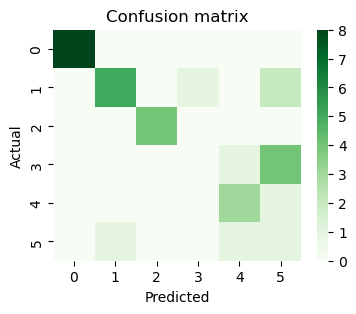

In [7]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,random_state=0)
model = dt.fit(x_tr,y_tr)
y_pred_dt = model.predict(x_te)

print("Decision Tree Results:\n")
print('Accuracy: ',accuracy_score(y_te,y_pred_dt))
print("Feature improtances: ",dt.feature_importances_)
print('Precision: ',precision_score(y_te,y_pred_dt,average='macro',zero_division=0))
print('Recall: ',recall_score(y_te,y_pred_dt,average='macro',zero_division=0))
print("F1: ",f1_score(y_te,y_pred_dt,average='macro',zero_division=0))
cm=confusion_matrix(y_te,y_pred_dt)

#Matrix showing counts of actual vs predicted labels
mat.figure (figsize=(4,3))
sns.heatmap(cm,annot=False,fmt='d',cmap='Greens') #
#Heatmap with annotation, integer format, blue colormap
mat.title("Confusion matrix")
mat.xlabel("Predicted")
mat.ylabel("Actual")
mat.show()

Random Forest Results:

Accuracy:  0.75
Precision:  0.7876984126984129
Recall:  0.7180555555555556
F1:  0.7357142857142858


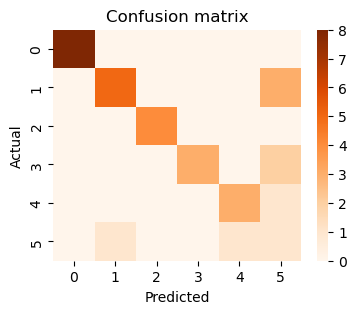

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(x_tr,y_tr)
y_pred_rf = model.predict(x_te)
print("Random Forest Results:\n")
print('Accuracy: ',accuracy_score(y_te,y_pred_rf))
print('Precision: ',precision_score(y_te,y_pred_rf,average='macro',zero_division=0))
print('Recall: ',recall_score(y_te,y_pred_rf,average='macro',zero_division=0))
print("F1: ",f1_score(y_te,y_pred_rf,average='macro',zero_division=0))
cm=confusion_matrix(y_te,y_pred_rf)

#Matrix showing counts of actual vs predicted labels
mat.figure (figsize=(4,3))
sns.heatmap(cm,annot=False,fmt='d',cmap='Oranges') #
#Heatmap with annotation, integer format, blue colormap
mat.title("Confusion matrix")
mat.xlabel("Predicted")
mat.ylabel("Actual")
mat.show()